In [18]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import pywt
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [6]:
CLASS_NAMES = os.listdir('./train_images/')
train_data = pd.read_csv('./train.csv')

In [7]:
def load_image(filename):
    with Image.open(filename) as image:
        return np.asarray(image)

def load_data():
    imagename, imagelabel = [], []
    for index, filedata in train_data.iterrows():
        imagename.append(filedata['image_id'])
        imagelabel.append(filedata['label'])
    
    X = []
    for index in range(imagename):
        filename = f'./train_images/{imagelabel[index]}/{imagename[index]}'
        X.append(load_image(filename=filename))

    X_train, X_test ,y_train, y_test = train_test_split(X, imagelabel, test_size=0.2, randomstate=42)
    return (X_train, y_train), (X_test, y_test)

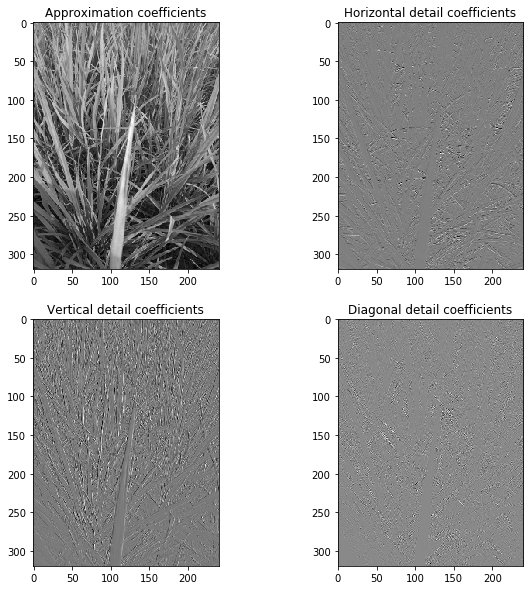

In [19]:
arr = load_image(f'./train_images/bacterial_leaf_blight/100513.jpg')
cA, (cH, cV, cD) = pywt.dwt2(np.mean(arr, axis=2), "haar")

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(cA, cmap='gray')
ax[0, 0].set_title("Approximation coefficients")
ax[0, 1].imshow(cH, cmap='gray')
ax[0, 1].set_title("Horizontal detail coefficients")
ax[1, 0].imshow(cV, cmap='gray')
ax[1, 0].set_title("Vertical detail coefficients")
ax[1, 1].imshow(cD, cmap='gray')
ax[1, 1].set_title("Diagonal detail coefficients")
plt.show()


In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

X_train_dwt, X_test_dwt = [], []

def extract_features(X, X_dwt=[]):
    #cA, (cH, cV, cD) -> Approximation, Horizontal Detail, Vertical Detail, Diagonal Detail
    #np.mean converts the rgb image to gray scale
    for image in X:
        cA, (cH, cV, cD) = pywt.dwt2(np.mean(image, axis=2), "haar")
        features = []
        #using mean helps with the overall image structure and intensity while the 
        #std provides info on the local variability and texture of the image
        features.append(np.mean(cA))
        features.append(np.std(cA))
        features.append(np.mean(cH))
        features.append(np.std(cH))
        features.append(np.mean(cV))
        features.append(np.std(cV))
        features.append(np.mean(cD))
        features.append(np.std(cD))
        X_dwt.append(features)
    return X_dwt

X_train_dwt = extract_features(X_train, X_train_dwt)
X_test_dwt = extract_features(X_test, X_test_dwt)